In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#from sklearn.metrics import cross_val_score 

In [80]:
data = sm.datasets.fair.load_pandas().data

In [81]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [82]:
#add "affair" column: 1 represents having affairs, 0 repersents not 
data['affair'] = (data.affairs >0).astype(int)

In [83]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [84]:
#df= pd.get_dummies(data['occupation'])
#df=df.iloc[:,1:]
#df

In [85]:
from patsy import dmatrices

y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', data, return_type='dataframe')


In [86]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [87]:
x.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [88]:
x = x.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [90]:
x = x.drop(['Intercept'],axis=1)
x.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [91]:
x.shape[0]

6366

In [53]:
#y = np.ravel(y)

In [92]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [93]:
x.corr(method='pearson')

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
occ_2,1.000000,-0.348075,-0.251243,-0.143237,-0.052128,0.183782,-0.020904,-0.009786,-0.093292,-0.059107,-0.019697,-0.034223,0.004668,0.081182,-0.013129,-0.217719
occ_3,-0.348075,1.000000,-0.560645,-0.319631,-0.116322,-0.000638,0.090043,0.011248,0.003021,-0.101673,-0.053082,-0.066371,-0.021261,-0.063298,-0.034986,-0.335615
occ_4,-0.251243,-0.560645,1.000000,-0.230712,-0.083962,-0.083123,-0.043159,0.037341,-0.001946,0.085766,0.068882,0.040982,-0.026816,-0.003235,0.043996,0.477505
occ_5,-0.143237,-0.319631,-0.230712,1.000000,-0.047868,-0.053426,-0.044053,-0.039932,0.114903,0.006016,-0.002109,0.079533,0.076820,0.033274,0.004260,-0.022121
occ_6,-0.052128,-0.116322,-0.083962,-0.047868,1.000000,-0.046140,-0.029028,-0.043541,-0.030926,0.218824,0.008878,0.030676,-0.004912,-0.026830,0.011784,0.226920
occ_husb_2,0.183782,-0.000638,-0.083123,-0.053426,-0.046140,1.000000,-0.146849,-0.347951,-0.316693,-0.153248,-0.038992,-0.057368,-0.033451,0.001190,0.009990,-0.160756
occ_husb_3,-0.020904,0.090043,-0.043159,-0.044053,-0.029028,-0.146849,1.000000,-0.197588,-0.179838,-0.087024,-0.022514,0.011610,0.008046,-0.005538,0.008170,-0.052723
occ_husb_4,-0.009786,0.011248,0.037341,-0.039932,-0.043541,-0.347951,-0.197588,1.000000,-0.426115,-0.206198,0.003303,-0.048989,-0.031121,-0.008032,-0.008491,-0.031422
occ_husb_5,-0.093292,0.003021,-0.001946,0.114903,-0.030926,-0.316693,-0.179838,-0.426115,1.000000,-0.187674,0.003256,0.105525,0.092462,0.053965,-0.000063,0.042540
occ_husb_6,-0.059107,-0.101673,0.085766,0.006016,0.218824,-0.153248,-0.087024,-0.206198,-0.187674,1.000000,0.039561,0.083212,0.042921,0.024260,0.006558,0.223167


In [94]:
x.describe()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


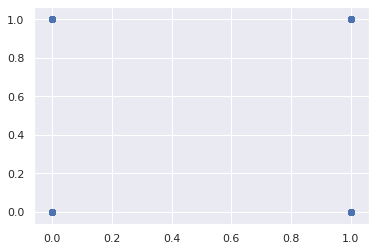

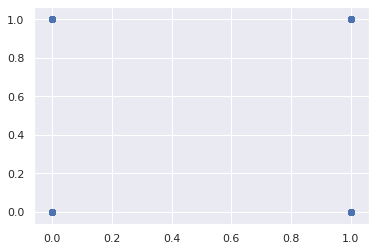

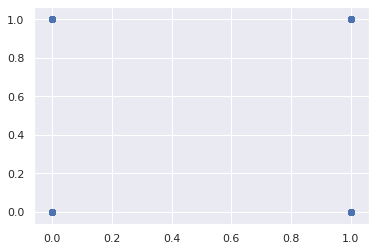

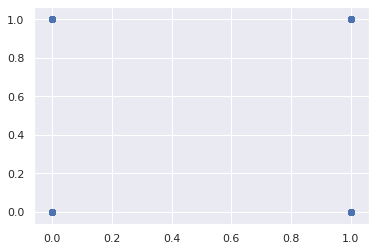

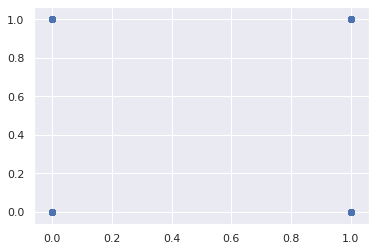

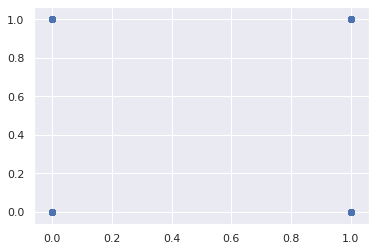

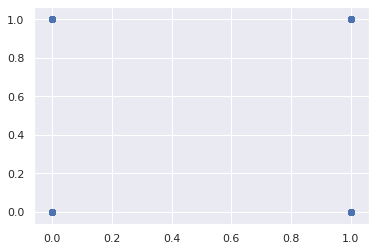

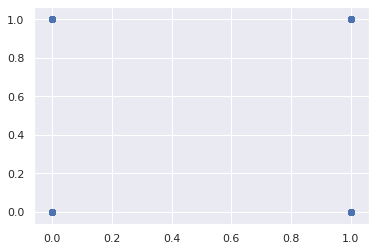

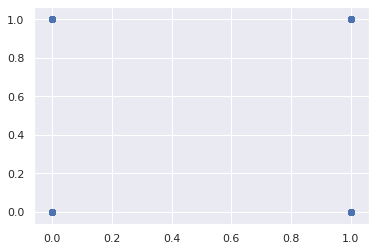

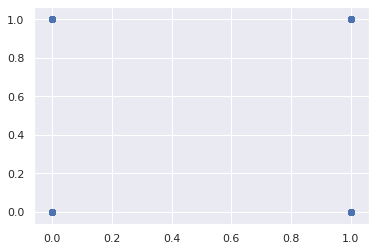

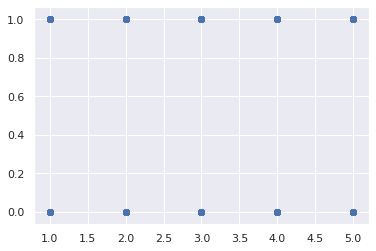

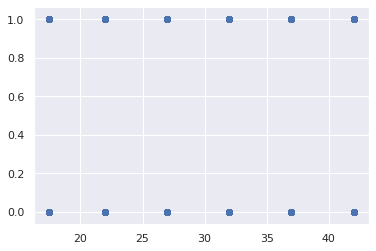

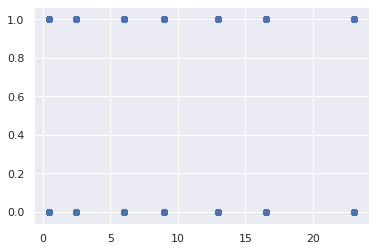

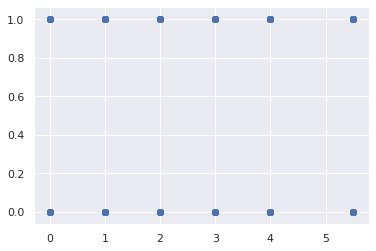

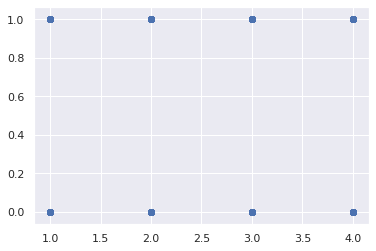

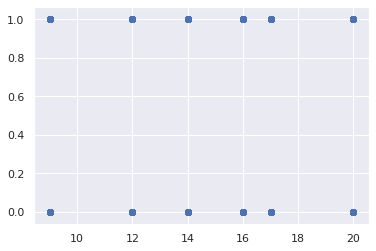

In [104]:
for col in x.columns:
    plt.scatter(x[col],y)
    plt.show()

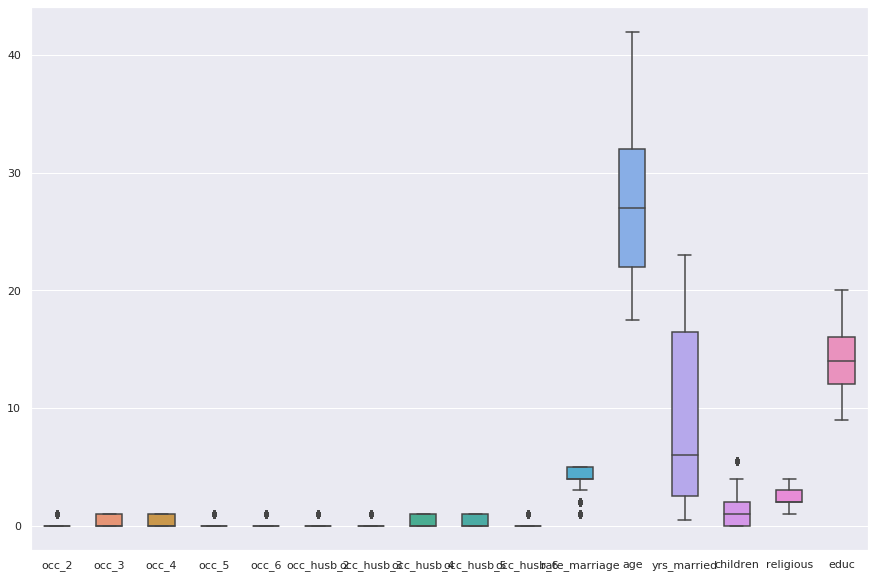

In [95]:
import seaborn as sns
sns.set()
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=x,ax=ax,width=0.5)

In [96]:
x.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 16 columns):
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
dtypes: float64(16)
memory usage: 845.5 KB


In [98]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 1 columns):
affair    6366 non-null float64
dtypes: float64(1)
memory usage: 99.5 KB


In [99]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [100]:
#y = np.ravel(y)

In [101]:
y.size

6366

In [102]:
x.shape[0]

6366

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.75,random_state=100)


In [105]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_predict = log_reg.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7160804020100503

In [112]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,y_predict)
mat

array([[976,  94],
       [358, 164]])

In [114]:
#recall
TP = mat[0][0]
FP = mat[0][1]
FN = mat[1][0]
TN = mat[1][1]
recall = TP/(TP+FN)
recall

0.7316341829085458

In [116]:
# precision 

precision = TP/(TP+FP)
precision

0.9121495327102803

In [118]:
#F1 score

F1 = 2*(recall*precision)/(recall+precision)
F1

0.8119800332778703